# EDA: univariate

In [1]:
import pandas as pd
import numpy as np
import math 

import re
import pickle

import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML


from statsmodels.stats.weightstats import DescrStatsW

## 1. Read in data

### Field names

In [2]:
field_names = []
with open('census_income_metadata.txt') as file:
    i = 0
    for line in file:
        i += 1
        
        if i > 142:
            label = line[:line.find(':')]
            if not label[0] == '|':
                field_names.append(label)
        
        if i > 185:
            break

In [3]:
#field_names

In [4]:
field_names = field_names + ['target']

In [5]:
len(field_names)

42

### Training dataset

In [6]:
train_df = pd.read_csv('census_income_learn.csv', names=field_names)

In [7]:
train_df.head()

age                  class of worker  detailed industry recode  \
0   73                  Not in universe                         0   
1   58   Self-employed-not incorporated                         4   
2   18                  Not in universe                         0   
3    9                  Not in universe                         0   
4   10                  Not in universe                         0   

   detailed occupation recode                    education  wage per hour  \
0                           0         High school graduate              0   
1                          34   Some college but no degree              0   
2                           0                   10th grade              0   
3                           0                     Children              0   
4                           0                     Children              0   

  enroll in edu inst last wk    marital stat           major industry code  \
0            Not in universe         Widowed   Not in universe or children   
1            Not in universe        Divorced                  Construction   
2                High school   Never married   Not in universe or children   
3            Not in universe   Never married   Not in universe or children   
4            Not in universe   Never married   Not in universe or children   

                  major occupation code  ... country of birth father  \
0                       Not in universe  ...           United-States   
1   Precision production craft & repair  ...           United-States   
2                       Not in universe  ...                 Vietnam   
3                       Not in universe  ...           United-States   
4                       Not in universe  ...           United-States   

  country of birth mother country of birth self  \
0           United-States         United-States   
1           United-States         United-States   
2                 Vietnam               Vietnam   
3           United-States         United-States   
4           United-States         United-States   

                            citizenship own business or self employed  \
0     Native- Born in the United States                             0   
1     Native- Born in the United States                             0   
2   Foreign born- Not a citizen of U S                              0   
3     Native- Born in the United States                             0   
4     Native- Born in the United States                             0   

  fill inc questionnaire for veteran's admin  veterans benefits  \
0                            Not in universe                  2   
1                            Not in universe                  2   
2                            Not in universe                  2   
3                            Not in universe                  0   
4                            Not in universe                  0   

   weeks worked in year  year     target  
0                     0    95   - 50000.  
1                    52    94   - 50000.  
2                     0    95   - 50000.  
3                     0    94   - 50000.  
4                     0    94   - 50000.  

[5 rows x 42 columns]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   age                                         199523 non-null  int64  
 1   class of worker                             199523 non-null  object 
 2   detailed industry recode                    199523 non-null  int64  
 3   detailed occupation recode                  199523 non-null  int64  
 4   education                                   199523 non-null  object 
 5   wage per hour                               199523 non-null  int64  
 6   enroll in edu inst last wk                  199523 non-null  object 
 7   marital stat                                199523 non-null  object 
 8   major industry code                         199523 non-null  object 
 9   major occupation code                       199523 non-null  object 
 

### Test dataset

In [9]:
test_df = pd.read_csv('census_income_test.csv', names=field_names)

In [10]:
test_df.head()

age                  class of worker  detailed industry recode  \
0   38                          Private                         6   
1   44   Self-employed-not incorporated                        37   
2    2                  Not in universe                         0   
3   35                          Private                        29   
4   49                          Private                         4   

   detailed occupation recode                             education  \
0                          36              1st 2nd 3rd or 4th grade   
1                          12   Associates degree-occup /vocational   
2                           0                              Children   
3                           3                  High school graduate   
4                          34                  High school graduate   

   wage per hour enroll in edu inst last wk                      marital stat  \
0              0            Not in universe   Married-civilian spouse present   
1              0            Not in universe   Married-civilian spouse present   
2              0            Not in universe                     Never married   
3              0            Not in universe                          Divorced   
4              0            Not in universe                          Divorced   

             major industry code                   major occupation code  ...  \
0    Manufacturing-durable goods   Machine operators assmblrs & inspctrs  ...   
1   Business and repair services                  Professional specialty  ...   
2    Not in universe or children                         Not in universe  ...   
3                 Transportation          Executive admin and managerial  ...   
4                   Construction     Precision production craft & repair  ...   

  country of birth father country of birth mother country of birth self  \
0                  Mexico                  Mexico                Mexico   
1           United-States           United-States         United-States   
2           United-States           United-States         United-States   
3           United-States           United-States         United-States   
4           United-States           United-States         United-States   

                            citizenship own business or self employed  \
0   Foreign born- Not a citizen of U S                              0   
1     Native- Born in the United States                             0   
2     Native- Born in the United States                             0   
3     Native- Born in the United States                             2   
4     Native- Born in the United States                             0   

  fill inc questionnaire for veteran's admin  veterans benefits  \
0                            Not in universe                  2   
1                            Not in universe                  2   
2                            Not in universe                  0   
3                            Not in universe                  2   
4                            Not in universe                  2   

   weeks worked in year  year     target  
0                    12    95   - 50000.  
1                    26    95   - 50000.  
2                     0    95   - 50000.  
3                    52    94   - 50000.  
4                    50    95   - 50000.  

[5 rows x 42 columns]

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99762 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   age                                         99762 non-null  int64  
 1   class of worker                             99762 non-null  object 
 2   detailed industry recode                    99762 non-null  int64  
 3   detailed occupation recode                  99762 non-null  int64  
 4   education                                   99762 non-null  object 
 5   wage per hour                               99762 non-null  int64  
 6   enroll in edu inst last wk                  99762 non-null  object 
 7   marital stat                                99762 non-null  object 
 8   major industry code                         99762 non-null  object 
 9   major occupation code                       99762 non-null  object 
 10  race      

## 2. Univariate stats

In [12]:
# weight field name
weight_fields = ['instance weight']

In [13]:
con_fields = [
    'age',
    'wage per hour',
    'capital gains',
    'capital losses',
    'dividends from stocks',
    'num persons worked for employer',
    'weeks worked in year',
]
nom_fields = list(set(train_df.columns)
                  .difference(set(con_fields + weight_fields)))

In [14]:
len(con_fields) + len(nom_fields) + len(weight_fields)

42

### Exploring instance weights

In [15]:
print('Population size represented in training dataset: '
      + f'{train_df[weight_fields].sum().values[0]:,}')

Population size represented in training dataset: 347,245,892.46999997


In [16]:
train_df[weight_fields].describe()

instance weight
count    199523.000000
mean       1740.380269
std         993.768156
min          37.870000
25%        1061.615000
50%        1618.310000
75%        2188.610000
max       18656.300000

In [17]:
weights_freq = pd.DataFrame(
    train_df['instance weight']
    .value_counts(bins=[x*100 for x in range(200)])
    .sort_index()).reset_index()
weights_freq.columns = ['weight_range', 'count']
weights_freq

weight_range  count
0       (-0.001, 100.0]    106
1        (100.0, 200.0]    825
2        (200.0, 300.0]   3555
3        (300.0, 400.0]   5703
4        (400.0, 500.0]   5275
..                  ...    ...
194  (19400.0, 19500.0]      0
195  (19500.0, 19600.0]      0
196  (19600.0, 19700.0]      0
197  (19700.0, 19800.0]      0
198  (19800.0, 19900.0]      0

[199 rows x 2 columns]

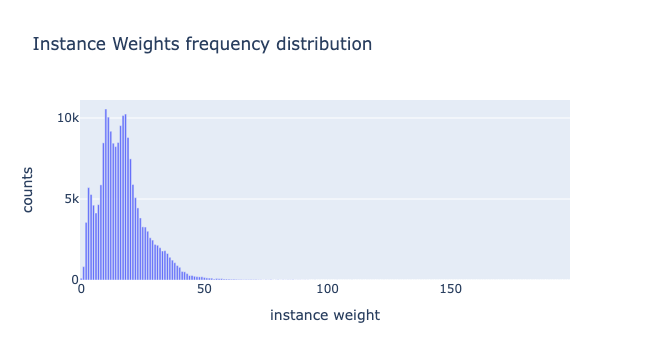

In [18]:
fig = px.bar(
    x=weights_freq.index, 
    y=weights_freq['count'], 
    title=f'Instance Weights frequency distribution'
)
fig.update_layout(xaxis_title='instance weight', yaxis_title='counts')
fig.show()

### Continuous fields

In [19]:
len(con_fields)

7

#### Unweighted descriptive stats

In [20]:
train_df[con_fields].describe()

age  wage per hour  capital gains  capital losses  \
count  199523.000000  199523.000000   199523.00000   199523.000000   
mean       34.494199      55.426908      434.71899       37.313788   
std        22.310895     274.896454     4697.53128      271.896428   
min         0.000000       0.000000        0.00000        0.000000   
25%        15.000000       0.000000        0.00000        0.000000   
50%        33.000000       0.000000        0.00000        0.000000   
75%        50.000000       0.000000        0.00000        0.000000   
max        90.000000    9999.000000    99999.00000     4608.000000   

       dividends from stocks  num persons worked for employer  \
count          199523.000000                    199523.000000   
mean              197.529533                         1.956180   
std              1984.163658                         2.365126   
min                 0.000000                         0.000000   
25%                 0.000000                         0.000000   
50%                 0.000000                         1.000000   
75%                 0.000000                         4.000000   
max             99999.000000                         6.000000   

       weeks worked in year  
count         199523.000000  
mean              23.174897  
std               24.411488  
min                0.000000  
25%                0.000000  
50%                8.000000  
75%               52.000000  
max               52.000000

In [21]:
def assign_bin(val, bins):
    for i, b in enumerate(bins):
        if val <= b:
            if i == 0:
                return f'<= {b}'
            else:
                return f'{bins[i-1]} - {b}'

age RANGE    frequency
0      <= 9  53473984.21
1    9 - 18  44784407.61
2   18 - 27  44098361.47
3   27 - 36  52530955.17
4   36 - 45  48562697.34
5   45 - 54  35233198.97
6   54 - 63  24757318.27
7   63 - 72  22511021.71
8   72 - 81  14767674.81
9   81 - 90   6526272.91

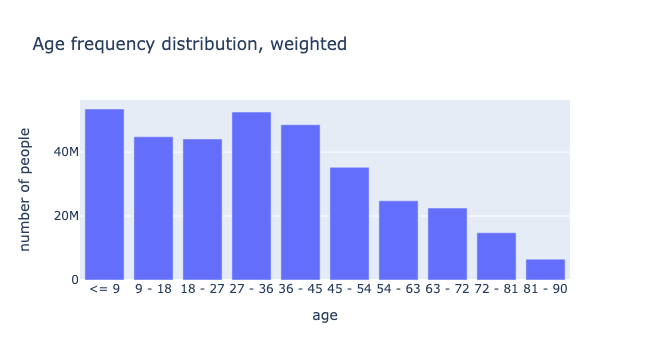

34    3489
35    3450
36    3353
31    3351
33    3340
5     3332
4     3318
3     3279
37    3278
38    3277
Name: age, dtype: int64

wage per hour RANGE     frequency
0             <= 1000  3.405393e+08
1         1000 - 2000  5.800434e+06
2         2000 - 3000  7.183379e+05
3         3000 - 4000  7.441814e+04
4         4000 - 5000  2.991578e+04
5         5000 - 5999  1.605433e+04
6         5999 - 6999  2.647371e+04
7         6999 - 7999  1.021729e+04
8         7999 - 8999  1.897434e+04
9         8999 - 9999  1.172670e+04

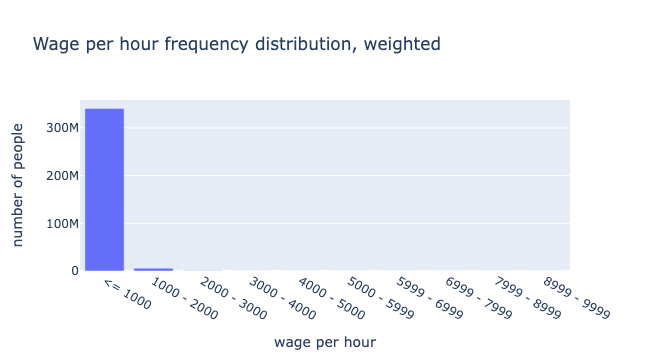

0       188219
500        734
600        546
700        534
800        507
1000       386
425        376
900        336
550        280
1200       256
Name: wage per hour, dtype: int64

capital gains RANGE     frequency
0            <= 10000  3.439545e+08
1       10000 - 20000  2.181082e+06
2       20000 - 30000  3.889253e+05
3       30000 - 40000  2.387009e+04
4       40000 - 50000  3.602970e+03
5       50000 - 59999           NaN
6       59999 - 69999           NaN
7       69999 - 79999           NaN
8       79999 - 89999           NaN
9       89999 - 99999  6.939533e+05

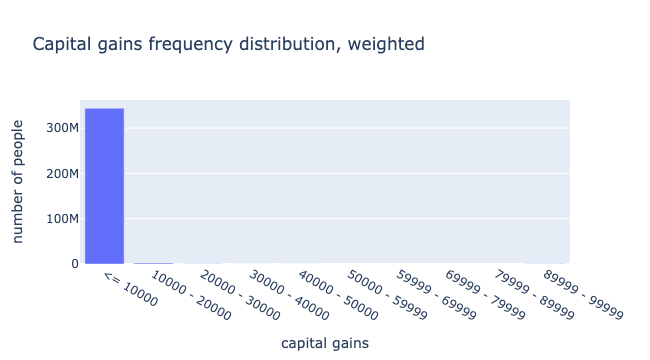

0        192144
15024       788
7688        609
7298        582
99999       390
3103        237
5178        207
5013        158
4386        151
3325        121
Name: capital gains, dtype: int64

capital losses RANGE     frequency
0               <= 461  3.402865e+08
1            461 - 922  8.957686e+04
2           922 - 1382  1.227866e+05
3          1382 - 1843  2.257291e+06
4          1843 - 2304  3.515635e+06
5          2304 - 2765  7.980929e+05
6          2765 - 3226  8.428668e+04
7          3226 - 3686  1.758326e+04
8          3686 - 4147  1.918308e+04
9          4147 - 4608  5.496519e+04

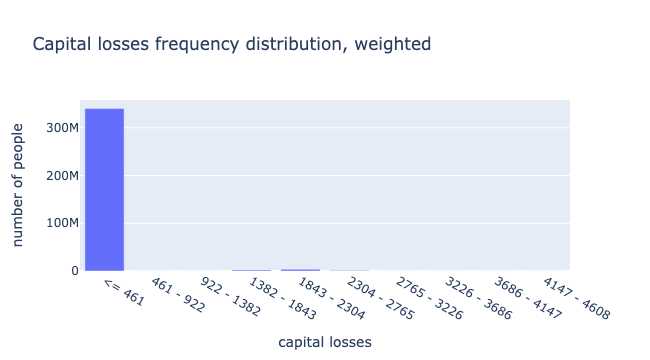

0       195617
1902       407
1977       381
1887       364
1602       193
2415       122
1485        95
1848        88
1876        87
1672        85
Name: capital losses, dtype: int64

dividends from stocks RANGE     frequency
0                    <= 10000  3.460095e+08
1               10000 - 20000  7.766513e+05
2               20000 - 30000  2.295089e+05
3               30000 - 40000  7.357241e+04
4               40000 - 50000  8.006498e+04
5               50000 - 59999  1.041664e+04
6               59999 - 69999  1.633603e+04
7               69999 - 79999  9.116200e+03
8               79999 - 89999           NaN
9               89999 - 99999  4.070083e+04

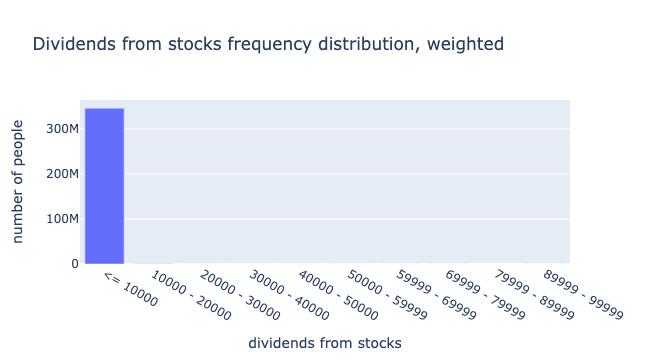

0       178382
100       1148
500       1030
1000       894
200        866
50         832
2000       574
250        555
150        549
300        523
Name: dividends from stocks, dtype: int64

num persons worked for employer RANGE     frequency
0                                  <= 1  2.034824e+08
1                                 1 - 2  1.762084e+07
2                                 2 - 3  2.355500e+07
3                                 3 - 4  2.550886e+07
4                                 4 - 5  1.086965e+07
5                                 5 - 6  6.620914e+07
6                                 6 - 7           NaN
7                                 7 - 8           NaN
8                                 8 - 9           NaN
9                                9 - 10           NaN

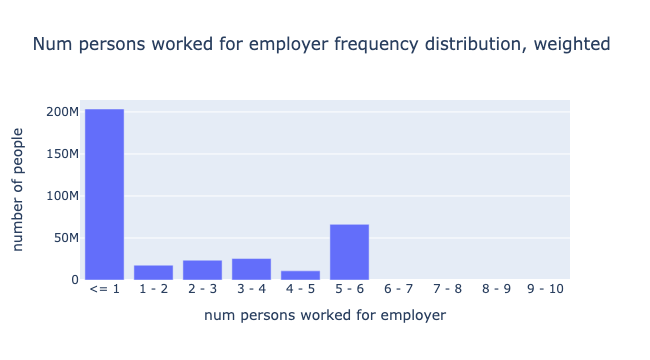

0    95983
6    36511
1    23109
4    14379
3    13425
2    10081
5     6035
Name: num persons worked for employer, dtype: int64

weeks worked in year RANGE     frequency
0                       <= 5  1.680270e+08
1                     5 - 10  5.021936e+06
2                    10 - 16  6.859146e+06
3                    16 - 21  3.801644e+06
4                    21 - 26  7.252390e+06
5                    26 - 31  3.789856e+06
6                    31 - 36  5.368604e+06
7                    36 - 42  8.012495e+06
8                    42 - 47  5.205342e+06
9                    47 - 52  1.339075e+08

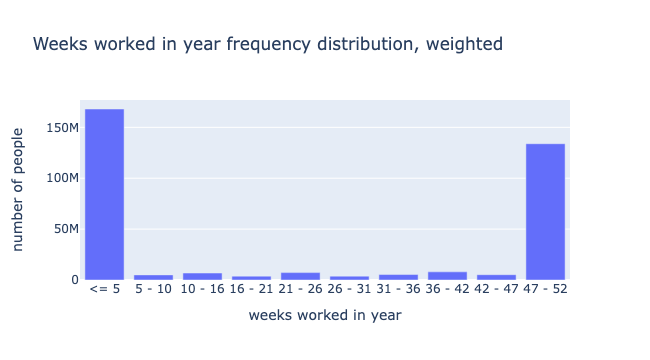

0     95983
52    70314
40     2790
50     2304
26     2268
48     1806
12     1780
30     1378
20     1330
8      1126
Name: weeks worked in year, dtype: int64

In [22]:
nbins = 10
    
for f in con_fields:
    display(HTML(f'<h3>Weighted descriptive stats for: {f}</h3>'))
    wdescr = DescrStatsW(train_df[f], weights=train_df['instance weight'])
    quantiles = wdescr.quantile([0.25, 0.5, 0.75]).values
    display(HTML(
        f'''<table>
              <tr>
                <td>mean</td>
                <td>{round(wdescr.mean, 3)}</td>
              </tr>
              <tr>
                <td>std</td>
                <td>{round(wdescr.std, 3)}</td>
              </tr>
              <tr>
                <td>min</td>
                <td>{train_df[f].min()}</td>
              </tr>
              <tr>
                <td>25%</td>
                <td>{quantiles[0]}</td>
              </tr>
              <tr>
                <td>median</td>
                <td>{quantiles[1]}</td>
              </tr>
              <tr>
                <td>75%</td>
                <td>{quantiles[2]}</td>
              </tr>
              <tr>
                <td>max</td>
                <td>{train_df[f].max()}</td>
              </tr>
            </table>'''
    ))
    
    bin_size = train_df[f].max()/nbins
    if bin_size > 1:
        bins = [round(x * bin_size) for x in range(1, nbins+1)]
    else:
        bins = [x for x in range(1, 11)]
        
    
    s0 = train_df[[f, 'instance weight']].copy()
    s0[f'{f} RANGE'] = s0[f].apply(assign_bin, args=(bins,))
    
    s1 = s0.groupby(f'{f} RANGE')['instance weight'].sum()
    
    bins_sorted = pd.DataFrame([assign_bin(x, bins) for x in bins], 
                               columns=[f'{f} RANGE'])
    
    s = bins_sorted.merge(s1.reset_index(), how='left', on=f'{f} RANGE')
    s.rename(columns={'instance weight': 'frequency'}, inplace=True)
    display(HTML('<h3>Frequency distribution table, weighted:</h3>'))
    display(s)
    
    fig = px.bar(
        x=s[f'{f} RANGE'], 
        y=s['frequency'],  
        title=f'{f.capitalize()} frequency distribution, weighted'
    )
    fig.update_layout(xaxis_title=f, yaxis_title='number of people')
    fig.show()
    
    display(HTML('<h3>Top 10 most frequent values, unweighted:</h3>'))
    display(train_df[f].value_counts(dropna=False).head(10))
    display(HTML('<hr><br>'))

### Categorical fields

In [23]:
nom_fields

['full or part time employment stat',
 'major industry code',
 'migration code-change in reg',
 'migration code-move within reg',
 'live in this house 1 year ago',
 'detailed household summary in household',
 'state of previous residence',
 'class of worker',
 'region of previous residence',
 'reason for unemployment',
 'major occupation code',
 'marital stat',
 'member of a labor union',
 'hispanic origin',
 'country of birth father',
 'migration code-change in msa',
 'race',
 'tax filer stat',
 'family members under 18',
 'migration prev res in sunbelt',
 'country of birth self',
 'target',
 'veterans benefits',
 "fill inc questionnaire for veteran's admin",
 'own business or self employed',
 'sex',
 'country of birth mother',
 'year',
 'detailed occupation recode',
 'detailed industry recode',
 'education',
 'detailed household and family stat',
 'citizenship',
 'enroll in edu inst last wk']

Convert categorical fields that were read in as numeric to strings.

In [24]:
train_df['year'] = train_df['year'].astype(str)
train_df['detailed occupation recode'] = \
    train_df['detailed occupation recode'].astype(str)
train_df['detailed industry recode'] = \
    train_df['detailed industry recode'].astype(str)
train_df['veterans benefits'] = \
    train_df['veterans benefits'].astype(str)
train_df['own business or self employed'] = \
    train_df['own business or self employed'].astype(str)

In [25]:
train_df[nom_fields].describe()

full or part time employment stat           major industry code  \
count                             199523                        199523   
unique                                 8                            24   
top             Children or Armed Forces   Not in universe or children   
freq                              123769                        100684   

       migration code-change in reg migration code-move within reg  \
count                        199523                         199523   
unique                            9                             10   
top                               ?                              ?   
freq                          99696                          99696   

            live in this house 1 year ago  \
count                              199523   
unique                                  3   
top      Not in universe under 1 year old   
freq                               101212   

       detailed household summary in household state of previous residence  \
count                                   199523                      199523   
unique                                       8                          51   
top                                Householder             Not in universe   
freq                                     75475                      183750   

         class of worker region of previous residence reason for unemployment  \
count             199523                       199523                  199523   
unique                 9                            6                       6   
top      Not in universe              Not in universe         Not in universe   
freq              100245                       183750                  193453   

        ... own business or self employed      sex country of birth mother  \
count   ...                        199523   199523                  199523   
unique  ...                             3        2                      43   
top     ...                             0   Female           United-States   
freq    ...                        180672   103984                  160479   

          year detailed occupation recode detailed industry recode  \
count   199523                     199523                   199523   
unique       2                         47                       52   
top         94                          0                        0   
freq     99827                     100684                   100684   

                    education detailed household and family stat  \
count                  199523                             199523   
unique                     17                                 38   
top      High school graduate                        Householder   
freq                    48407                              53248   

                               citizenship enroll in edu inst last wk  
count                               199523                     199523  
unique                                   5                          3  
top      Native- Born in the United States            Not in universe  
freq                                176992                     186943  

[4 rows x 34 columns]

full or part time employment stat     frequency
0             Children or Armed Forces  2.129070e+08
1                  Full-time schedules  7.263862e+07
2                   Not in labor force  4.684131e+07
3       PT for econ reasons usually FT  9.507238e+05
4       PT for econ reasons usually PT  2.160595e+06
5   PT for non-econ reasons usually FT  5.997410e+06
6                 Unemployed full-time  4.214827e+06
7                Unemployed part- time  1.535414e+06

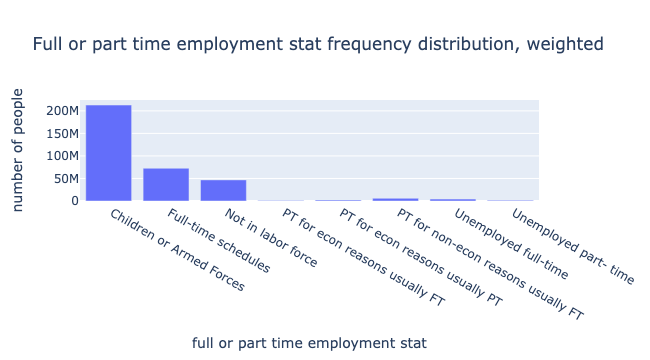

 Children or Armed Forces              123769
 Full-time schedules                    40736
 Not in labor force                     26808
 PT for non-econ reasons usually FT      3322
 Unemployed full-time                    2311
 PT for econ reasons usually PT          1209
 Unemployed part- time                    843
 PT for econ reasons usually FT           525
Name: full or part time employment stat, dtype: int64

major industry code     frequency
0                            Agriculture  4.969347e+06
1                           Armed Forces  6.901379e+04
2           Business and repair services  1.072809e+07
3                         Communications  2.078938e+06
4                           Construction  1.069942e+07
5                              Education  1.436299e+07
6                          Entertainment  2.947153e+06
7      Finance insurance and real estate  1.109837e+07
8                 Forestry and fisheries  2.526702e+05
9                      Hospital services  6.833430e+06
10           Manufacturing-durable goods  1.648992e+07
11        Manufacturing-nondurable goods  1.219977e+07
12               Medical except hospital  8.266903e+06
13                                Mining  8.755347e+05
14           Not in universe or children  1.716781e+08
15           Other professional services  8.053509e+06
16   Personal services except private HH  4.959266e+06
17            Private household services  1.604126e+06
18                 Public administration  8.169593e+06
19                          Retail trade  3.056142e+07
20                       Social services  4.266264e+06
21                        Transportation  7.486664e+06
22       Utilities and sanitary services  2.139292e+06
23                       Wholesale trade  6.456143e+06

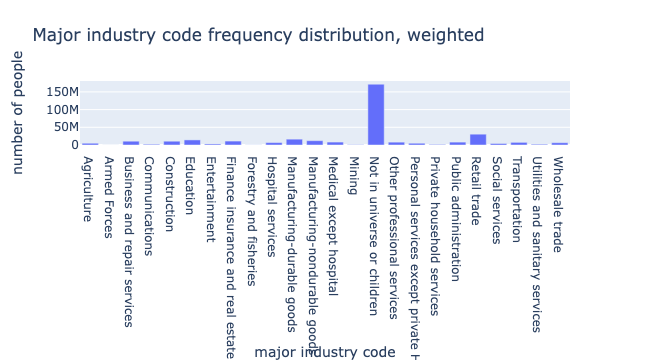

 Not in universe or children          100684
 Retail trade                          17070
 Manufacturing-durable goods            9015
 Education                              8283
 Manufacturing-nondurable goods         6897
 Finance insurance and real estate      6145
 Construction                           5984
 Business and repair services           5651
 Medical except hospital                4683
 Public administration                  4610
Name: major industry code, dtype: int64

migration code-change in reg     frequency
0                                ?  1.746753e+08
1                           Abroad  9.008612e+05
2      Different county same state  5.539193e+06
3   Different division same region  7.492626e+05
4                 Different region  2.088194e+06
5    Different state same division  1.688479e+06
6                         Nonmover  1.412779e+08
7                  Not in universe  2.670705e+06
8                      Same county  1.765602e+07

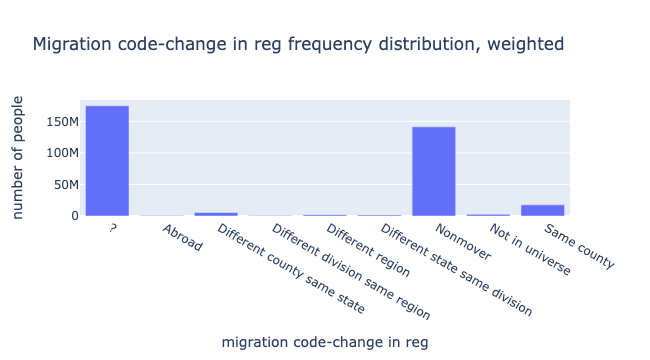

 ?                                 99696
 Nonmover                          82538
 Same county                        9812
 Different county same state        2797
 Not in universe                    1516
 Different region                   1178
 Different state same division       991
 Abroad                              530
 Different division same region      465
Name: migration code-change in reg, dtype: int64

migration code-move within reg     frequency
0                              ?  1.746753e+08
1                         Abroad  9.008612e+05
2    Different county same state  5.539193e+06
3     Different state in Midwest  9.947751e+05
4   Different state in Northeast  7.110786e+05
5       Different state in South  1.799130e+06
6        Different state in West  1.020952e+06
7                       Nonmover  1.412779e+08
8                Not in universe  2.670705e+06
9                    Same county  1.765602e+07

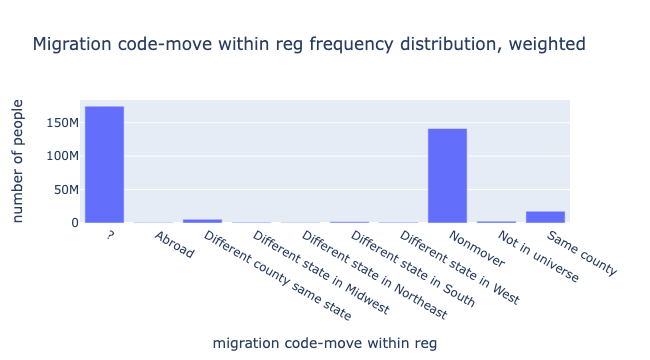

 ?                               99696
 Nonmover                        82538
 Same county                      9812
 Different county same state      2797
 Not in universe                  1516
 Different state in South          973
 Different state in West           679
 Different state in Midwest        551
 Abroad                            530
 Different state in Northeast      431
Name: migration code-move within reg, dtype: int64

live in this house 1 year ago     frequency
0                                 No  2.862201e+07
1   Not in universe under 1 year old  1.773460e+08
2                                Yes  1.412779e+08

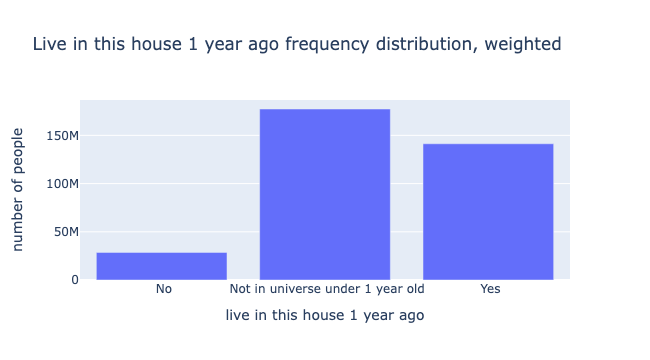

 Not in universe under 1 year old    101212
 Yes                                  82538
 No                                   15773
Name: live in this house 1 year ago, dtype: int64

detailed household summary in household     frequency
0                       Child 18 or older  2.890851e+07
1             Child under 18 ever married  7.096567e+04
2            Child under 18 never married  8.396315e+07
3    Group Quarters- Secondary individual  1.943183e+05
4                             Householder  1.302764e+08
5              Nonrelative of householder  1.472089e+07
6           Other relative of householder  1.754472e+07
7                   Spouse of householder  7.156694e+07

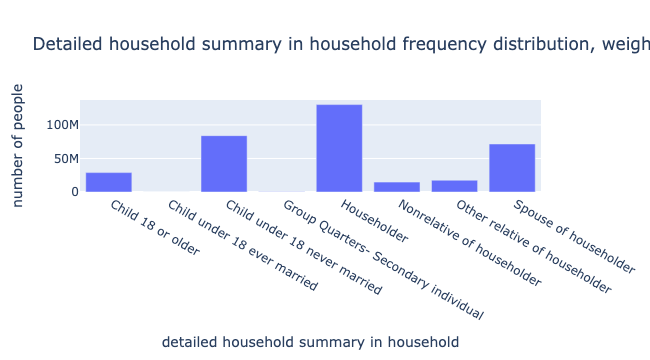

 Householder                             75475
 Child under 18 never married            50426
 Spouse of householder                   41709
 Child 18 or older                       14430
 Other relative of householder            9703
 Nonrelative of householder               7601
 Group Quarters- Secondary individual      132
 Child under 18 ever married                47
Name: detailed household summary in household, dtype: int64

state of previous residence     frequency
0                            ?  1.573471e+06
1                       Abroad  9.881577e+05
2                      Alabama  4.956897e+05
3                       Alaska  9.537258e+04
4                      Arizona  5.431773e+05
5                     Arkansas  3.137267e+05
6                   California  4.069633e+06
7                     Colorado  4.381252e+05
8                  Connecticut  2.498226e+05
9                     Delaware  4.913444e+04
10        District of Columbia  9.843776e+04
11                     Florida  1.726156e+06
12                     Georgia  7.296468e+05
13                       Idaho  4.033127e+04
14                    Illinois  1.064757e+05
15                     Indiana  9.921964e+05
16                        Iowa  6.408238e+05
17                      Kansas  2.436230e+05
18                    Kentucky  3.305859e+05
19                   Louisiana  4.021361e+05
20                       Maine  4.258830e+05
21                    Maryland  1.226281e+05
22               Massachusetts  3.983332e+05
23                    Michigan  4.879064e+05
24                   Minnesota  9.725754e+05
25                 Mississippi  4.800176e+05
26                    Missouri  2.756862e+05
27                     Montana  6.840926e+05
28                    Nebraska  1.011340e+05
29                      Nevada  1.861607e+05
30               New Hampshire  2.517288e+05
31                  New Jersey  9.504988e+04
32                  New Mexico  6.231978e+05
33                    New York  1.831428e+05
34              North Carolina  1.430457e+06
35                North Dakota  6.787797e+05
36             Not in universe  3.186239e+08
37                        Ohio  9.675620e+04
38                    Oklahoma  1.111655e+06
39                      Oregon  4.291161e+05
40                Pennsylvania  3.749884e+05
41              South Carolina  7.495545e+04
42                South Dakota  2.735427e+05
43                   Tennessee  9.097350e+04
44                       Texas  5.537427e+05
45                        Utah  2.383518e+06
46                     Vermont  2.023131e+05
47                    Virginia  7.347217e+04
48               West Virginia  6.754950e+05
49                   Wisconsin  1.284969e+05
50                     Wyoming  6.294859e+05

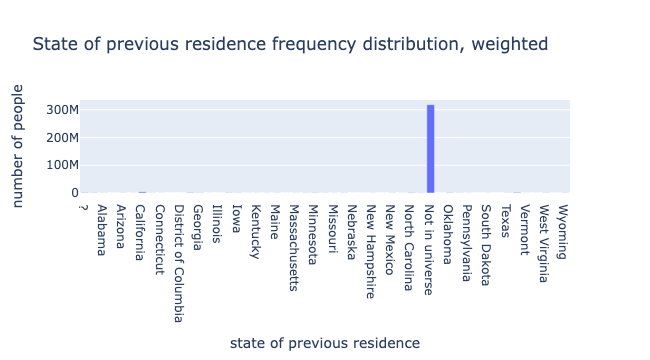

 Not in universe    183750
 California           1714
 Utah                 1063
 Florida               849
 North Carolina        812
 ?                     708
 Abroad                671
 Oklahoma              626
 Minnesota             576
 Indiana               533
Name: state of previous residence, dtype: int64

class of worker     frequency
0               Federal government  5.053904e+06
1                 Local government  1.374835e+07
2                     Never worked  8.076583e+05
3                  Not in universe  1.708704e+08
4                          Private  1.291665e+08
5       Self-employed-incorporated  5.652140e+06
6   Self-employed-not incorporated  1.451549e+07
7                 State government  7.165721e+06
8                      Without pay  2.657429e+05

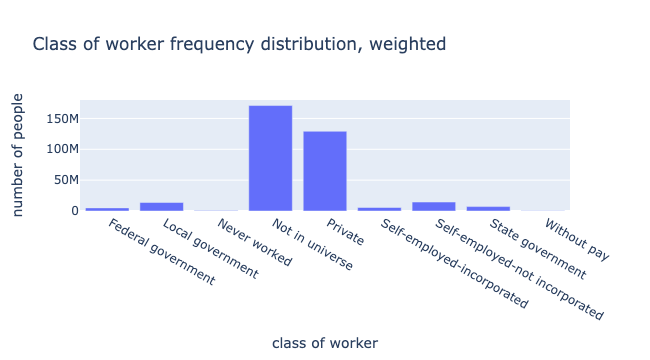

 Not in universe                   100245
 Private                            72028
 Self-employed-not incorporated      8445
 Local government                    7784
 State government                    4227
 Self-employed-incorporated          3265
 Federal government                  2925
 Never worked                         439
 Without pay                          165
Name: class of worker, dtype: int64

region of previous residence     frequency
0                       Abroad  9.008612e+05
1                      Midwest  6.458946e+06
2                    Northeast  3.998805e+06
3              Not in universe  3.186239e+08
4                        South  1.009418e+07
5                         West  7.169214e+06

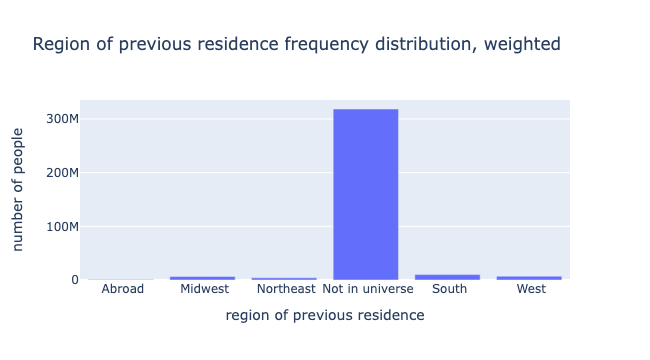

 Not in universe    183750
 South                4889
 West                 4074
 Midwest              3575
 Northeast            2705
 Abroad                530
Name: region of previous residence, dtype: int64

reason for unemployment     frequency
0              Job leaver  1.136366e+06
1   Job loser - on layoff  1.624527e+06
2             New entrant  8.076583e+05
3         Not in universe  3.361116e+08
4         Other job loser  3.785951e+06
5              Re-entrant  3.779794e+06

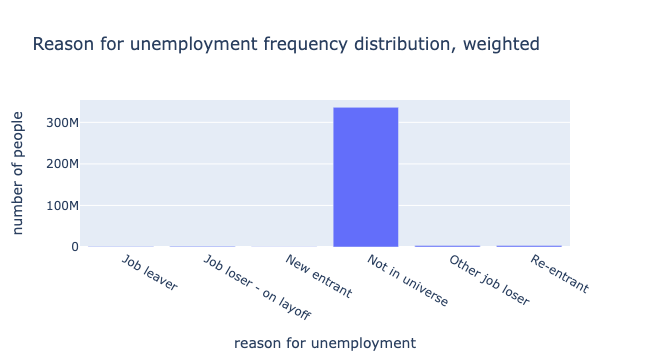

 Not in universe          193453
 Other job loser            2038
 Re-entrant                 2019
 Job loser - on layoff       976
 Job leaver                  598
 New entrant                 439
Name: reason for unemployment, dtype: int64

major occupation code     frequency
0           Adm support including clerical  2.635368e+07
1                             Armed Forces  6.901379e+04
2           Executive admin and managerial  2.219117e+07
3             Farming forestry and fishing  5.177166e+06
4             Handlers equip cleaners etc   7.580926e+06
5    Machine operators assmblrs & inspctrs  1.133860e+07
6                          Not in universe  1.716781e+08
7                            Other service  2.096747e+07
8      Precision production craft & repair  1.884325e+07
9               Private household services  1.311144e+06
10                  Professional specialty  2.461443e+07
11                     Protective services  3.179314e+06
12                                   Sales  2.121534e+07
13         Technicians and related support  5.460453e+06
14      Transportation and material moving  7.265852e+06

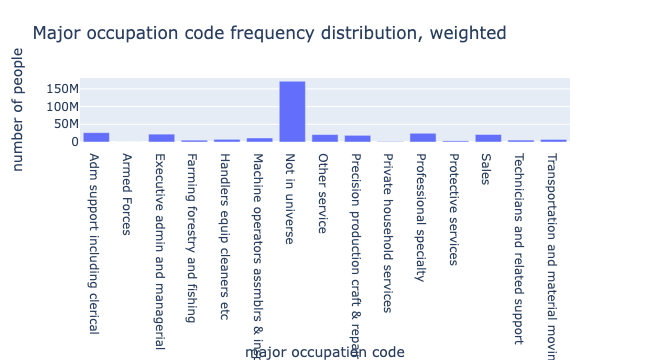

 Not in universe                          100684
 Adm support including clerical            14837
 Professional specialty                    13940
 Executive admin and managerial            12495
 Other service                             12099
 Sales                                     11783
 Precision production craft & repair       10518
 Machine operators assmblrs & inspctrs      6379
 Handlers equip cleaners etc                4127
 Transportation and material moving         4020
Name: major occupation code, dtype: int64

marital stat     frequency
0                          Divorced  2.317747e+07
1        Married-A F spouse present  1.100045e+06
2   Married-civilian spouse present  1.444042e+08
3             Married-spouse absent  2.648742e+06
4                     Never married  1.519181e+08
5                         Separated  6.448192e+06
6                           Widowed  1.754912e+07

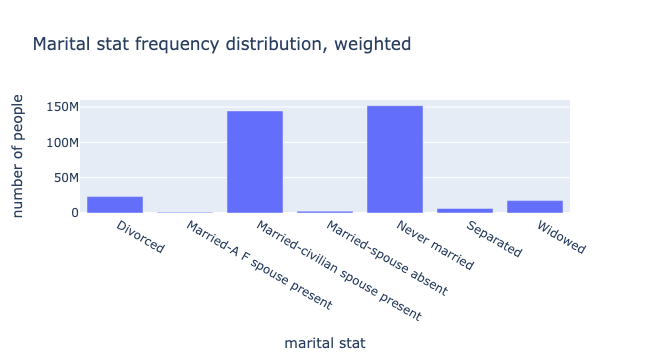

 Never married                      86485
 Married-civilian spouse present    84222
 Divorced                           12710
 Widowed                            10463
 Separated                           3460
 Married-spouse absent               1518
 Married-A F spouse present           665
Name: marital stat, dtype: int64

member of a labor union     frequency
0                      No  2.909889e+07
1         Not in universe  3.128520e+08
2                     Yes  5.294994e+06

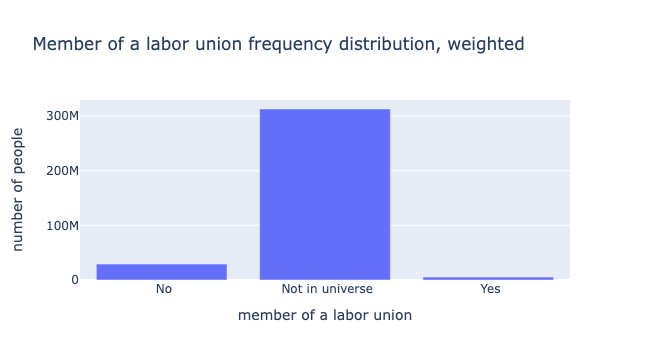

 Not in universe    180459
 No                  16034
 Yes                  3030
Name: member of a labor union, dtype: int64

hispanic origin     frequency
0                   All other  3.090763e+08
1   Central or South American  4.890342e+06
2                     Chicano  3.769149e+05
3                       Cuban  1.470804e+06
4                 Do not know  5.795131e+05
5          Mexican (Mexicano)  1.098667e+07
6            Mexican-American  1.194980e+07
7                          NA  1.643035e+06
8               Other Spanish  2.582694e+06
9                Puerto Rican  3.689784e+06

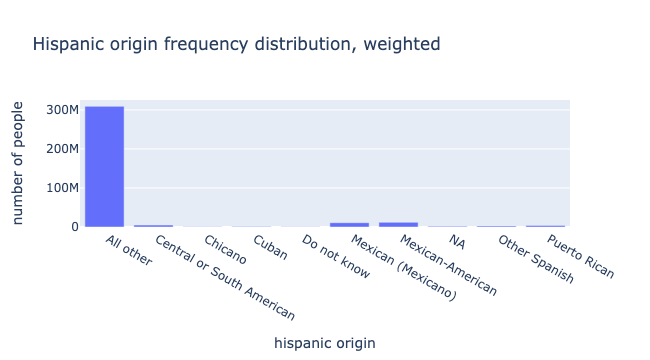

 All other                    171907
 Mexican-American               8079
 Mexican (Mexicano)             7234
 Central or South American      3895
 Puerto Rican                   3313
 Other Spanish                  2485
 Cuban                          1126
 NA                              874
 Do not know                     306
 Chicano                         304
Name: hispanic origin, dtype: int64

country of birth father     frequency
0                               ?  1.118145e+07
1                        Cambodia  3.273209e+05
2                          Canada  2.106980e+06
3                           China  1.362980e+06
4                        Columbia  7.003743e+05
5                            Cuba  1.493422e+06
6              Dominican-Republic  1.447217e+06
7                         Ecuador  4.003290e+05
8                     El-Salvador  1.487697e+06
9                         England  1.393016e+06
10                         France  3.447012e+05
11                        Germany  2.323453e+06
12                         Greece  5.520596e+05
13                      Guatemala  5.901510e+05
14                          Haiti  6.516898e+05
15             Holand-Netherlands  9.187680e+04
16                       Honduras  2.928508e+05
17                      Hong Kong  1.573924e+05
18                        Hungary  5.661026e+05
19                          India  8.635359e+05
20                           Iran  4.406904e+05
21                        Ireland  8.036559e+05
22                          Italy  3.760459e+06
23                        Jamaica  9.002590e+05
24                          Japan  5.922885e+05
25                           Laos  3.010222e+05
26                         Mexico  1.523234e+07
27                      Nicaragua  4.704902e+05
28   Outlying-U S (Guam USVI etc)  2.290755e+05
29                         Panama  3.340197e+04
30                           Peru  4.151243e+05
31                    Philippines  1.844092e+06
32                         Poland  2.142548e+06
33                       Portugal  5.450495e+05
34                    Puerto-Rico  3.024703e+06
35                       Scotland  4.167655e+05
36                    South Korea  8.358517e+05
37                         Taiwan  3.148143e+05
38                       Thailand  1.556499e+05
39                Trinadad&Tobago  2.096931e+05
40                  United-States  2.850877e+08
41                        Vietnam  7.532606e+05
42                     Yugoslavia  4.024074e+05

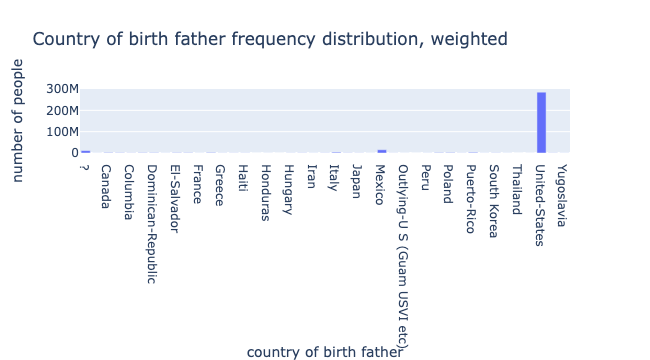

 United-States         159163
 Mexico                 10008
 ?                       6713
 Puerto-Rico             2680
 Italy                   2212
 Canada                  1380
 Germany                 1356
 Dominican-Republic      1290
 Poland                  1212
 Philippines             1154
Name: country of birth father, dtype: int64

migration code-change in msa     frequency
0                            ?  1.746753e+08
1                Abroad to MSA  7.967320e+05
2             Abroad to nonMSA  1.006009e+05
3                   MSA to MSA  2.073675e+07
4                MSA to nonMSA  1.219002e+06
5                NonMSA to MSA  1.158451e+06
6             NonMSA to nonMSA  4.189388e+06
7                     Nonmover  1.412779e+08
8             Not identifiable  4.210820e+05
9              Not in universe  2.670705e+06

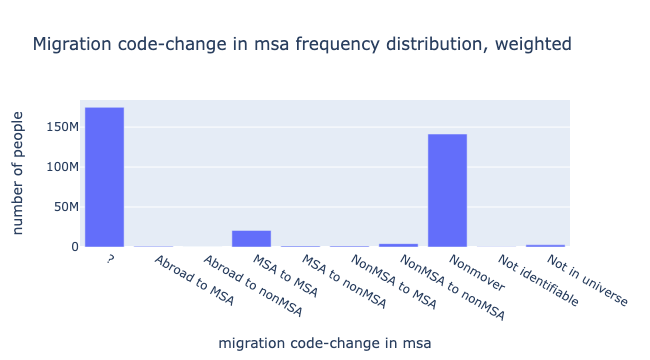

 ?                   99696
 Nonmover            82538
 MSA to MSA          10601
 NonMSA to nonMSA     2811
 Not in universe      1516
 MSA to nonMSA         790
 NonMSA to MSA         615
 Abroad to MSA         453
 Not identifiable      430
 Abroad to nonMSA       73
Name: migration code-change in msa, dtype: int64

race     frequency
0   Amer Indian Aleut or Eskimo  2.053395e+06
1     Asian or Pacific Islander  8.920936e+06
2                         Black  4.448490e+07
3                         Other  3.940880e+06
4                         White  2.878458e+08

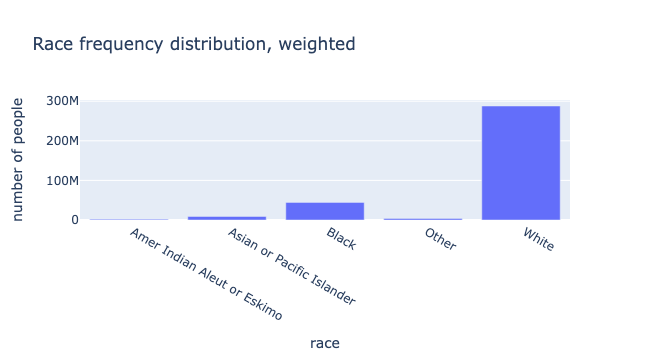

 White                          167365
 Black                           20415
 Asian or Pacific Islander        5835
 Other                            3657
 Amer Indian Aleut or Eskimo      2251
Name: race, dtype: int64

tax filer stat     frequency
0              Head of household  1.317818e+07
1                 Joint both 65+  1.435770e+07
2            Joint both under 65  1.156458e+08
3   Joint one under 65 & one 65+  6.653446e+06
4                       Nonfiler  1.278918e+08
5                         Single  6.951902e+07

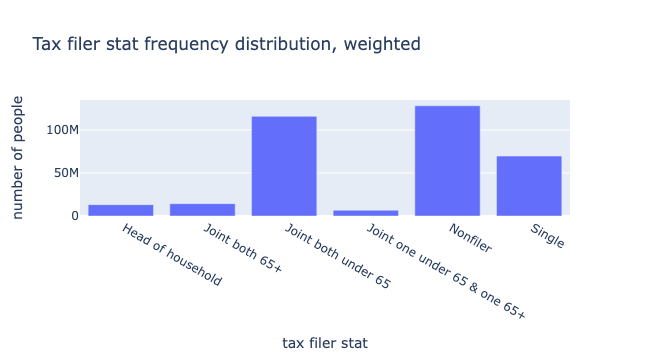

 Nonfiler                        75094
 Joint both under 65             67383
 Single                          37421
 Joint both 65+                   8332
 Head of household                7426
 Joint one under 65 & one 65+     3867
Name: tax filer stat, dtype: int64

family members under 18     frequency
0     Both parents present  6.432913e+07
1      Father only present  3.151753e+06
2      Mother only present  2.202763e+07
3   Neither parent present  3.008288e+06
4          Not in universe  2.547291e+08

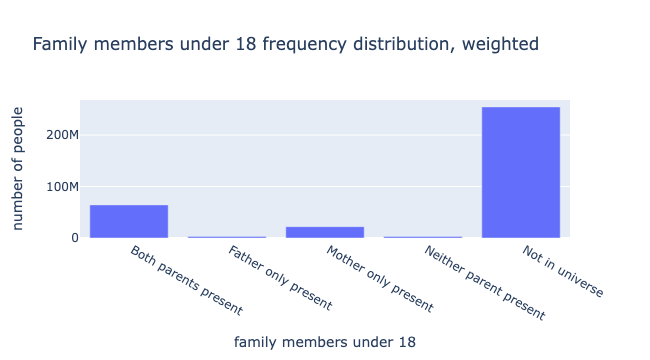

 Not in universe           144232
 Both parents present       38983
 Mother only present        12772
 Father only present         1883
 Neither parent present      1653
Name: family members under 18, dtype: int64

migration prev res in sunbelt     frequency
0                             ?  1.746753e+08
1                            No  1.685655e+07
2               Not in universe  1.439486e+08
3                           Yes  1.176546e+07

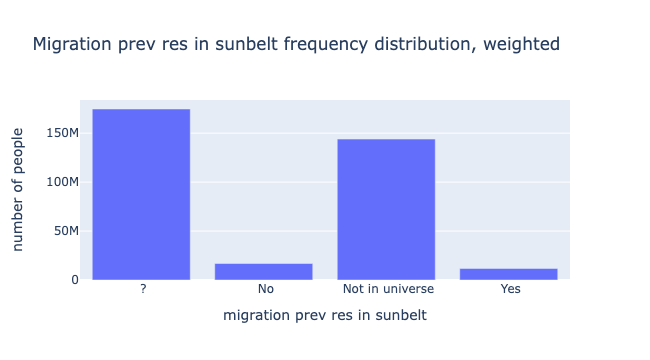

 ?                  99696
 Not in universe    84054
 No                  9987
 Yes                 5786
Name: migration prev res in sunbelt, dtype: int64

country of birth self     frequency
0                               ?  5.727526e+06
1                        Cambodia  1.719146e+05
2                          Canada  1.182619e+06
3                           China  7.188203e+05
4                        Columbia  4.814114e+05
5                            Cuba  1.093367e+06
6              Dominican-Republic  7.203271e+05
7                         Ecuador  2.606624e+05
8                     El-Salvador  1.043763e+06
9                         England  7.971816e+05
10                         France  2.293132e+05
11                        Germany  1.542549e+06
12                         Greece  2.267157e+05
13                      Guatemala  4.614649e+05
14                          Haiti  4.353385e+05
15             Holand-Netherlands  3.632253e+04
16                       Honduras  2.276131e+05
17                      Hong Kong  1.698056e+05
18                        Hungary  1.531008e+05
19                          India  6.045620e+05
20                           Iran  3.126471e+05
21                        Ireland  2.179091e+05
22                          Italy  6.957548e+05
23                        Jamaica  6.101138e+05
24                          Japan  5.516902e+05
25                           Laos  2.156425e+05
26                         Mexico  8.880586e+06
27                      Nicaragua  3.360377e+05
28   Outlying-U S (Guam USVI etc)  1.988413e+05
29                         Panama  4.278987e+04
30                           Peru  3.323648e+05
31                    Philippines  1.384611e+06
32                         Poland  6.910901e+05
33                       Portugal  2.408763e+05
34                    Puerto-Rico  1.561996e+06
35                       Scotland  1.235720e+05
36                    South Korea  7.553359e+05
37                         Taiwan  3.218849e+05
38                       Thailand  1.794832e+05
39                Trinadad&Tobago  1.305763e+05
40                  United-States  3.123882e+08
41                        Vietnam  6.693309e+05
42                     Yugoslavia  1.202063e+05

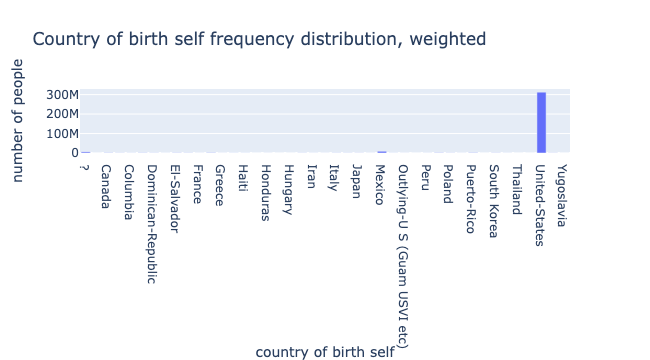

 United-States         176989
 Mexico                  5767
 ?                       3393
 Puerto-Rico             1400
 Germany                  851
 Philippines              845
 Cuba                     837
 Canada                   700
 Dominican-Republic       690
 El-Salvador              689
Name: country of birth self, dtype: int64

target     frequency
0   - 50000.  3.250046e+08
1    50000+.  2.224125e+07

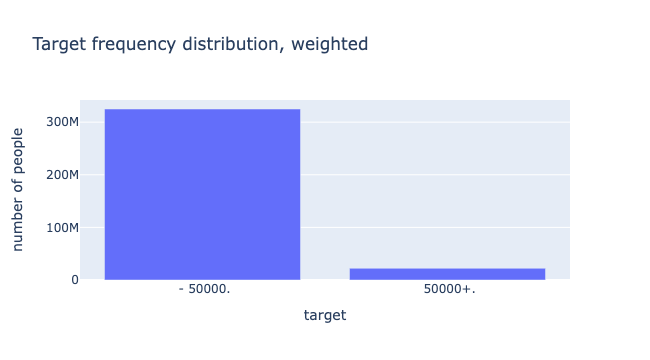

 - 50000.    187141
 50000+.      12382
Name: target, dtype: int64

veterans benefits     frequency
0                 0  7.907788e+07
1                 1  3.477832e+06
2                 2  2.646902e+08

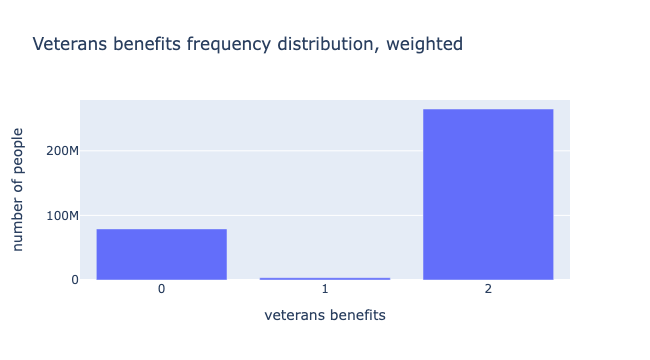

2    150130
0     47409
1      1984
Name: veterans benefits, dtype: int64

fill inc questionnaire for veteran's admin     frequency
0                                         No  2.782540e+06
1                            Not in universe  3.437681e+08
2                                        Yes  6.952914e+05

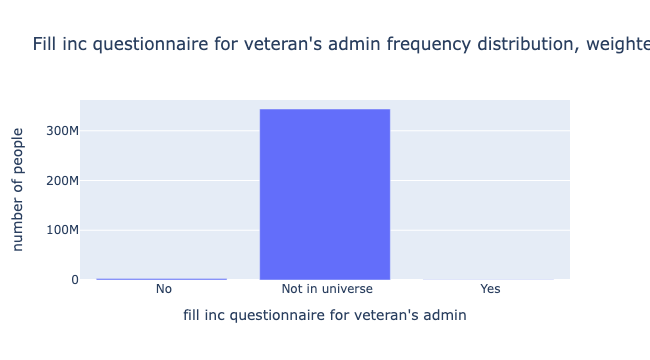

 Not in universe    197539
 No                   1593
 Yes                   391
Name: fill inc questionnaire for veteran's admin, dtype: int64

own business or self employed     frequency
0                             0  3.137138e+08
1                             1  4.790356e+06
2                             2  2.874170e+07

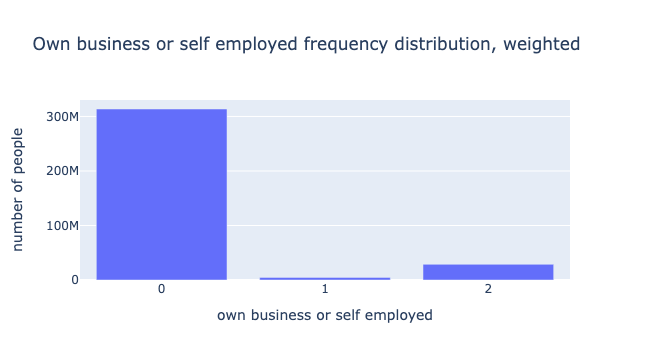

0    180672
2     16153
1      2698
Name: own business or self employed, dtype: int64

sex     frequency
0   Female  1.778032e+08
1     Male  1.694427e+08

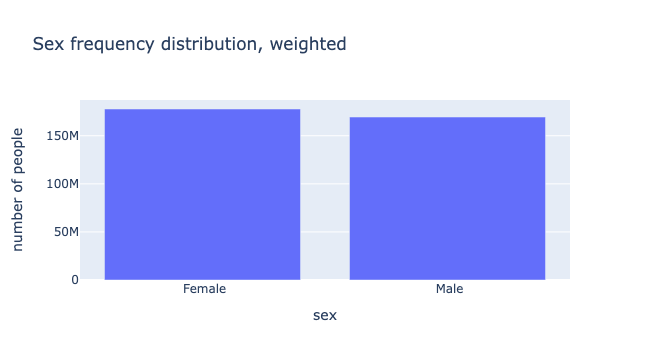

 Female    103984
 Male       95539
Name: sex, dtype: int64

country of birth mother     frequency
0                               ?  1.020107e+07
1                        Cambodia  2.637599e+05
2                          Canada  2.268896e+06
3                           China  1.193858e+06
4                        Columbia  6.855347e+05
5                            Cuba  1.461858e+06
6              Dominican-Republic  1.183182e+06
7                         Ecuador  3.837814e+05
8                     El-Salvador  1.667132e+06
9                         England  1.577164e+06
10                         France  3.711918e+05
11                        Germany  2.455026e+06
12                         Greece  4.234114e+05
13                      Guatemala  5.899541e+05
14                          Haiti  6.480300e+05
15             Holand-Netherlands  7.443464e+04
16                       Honduras  3.311673e+05
17                      Hong Kong  1.690090e+05
18                        Hungary  5.419772e+05
19                          India  8.857579e+05
20                           Iran  3.970413e+05
21                        Ireland  9.451282e+05
22                          Italy  3.084000e+06
23                        Jamaica  8.709806e+05
24                          Japan  7.449591e+05
25                           Laos  3.009823e+05
26                         Mexico  1.488412e+07
27                      Nicaragua  4.613843e+05
28   Outlying-U S (Guam USVI etc)  2.234709e+05
29                         Panama  4.296952e+04
30                           Peru  4.490871e+05
31                    Philippines  2.016761e+06
32                         Poland  1.937589e+06
33                       Portugal  4.627416e+05
34                    Puerto-Rico  2.776873e+06
35                       Scotland  4.109416e+05
36                    South Korea  9.706064e+05
37                         Taiwan  3.566981e+05
38                       Thailand  1.869226e+05
39                Trinadad&Tobago  1.925483e+05
40                  United-States  2.870212e+08
41                        Vietnam  7.830828e+05
42                     Yugoslavia  3.496040e+05

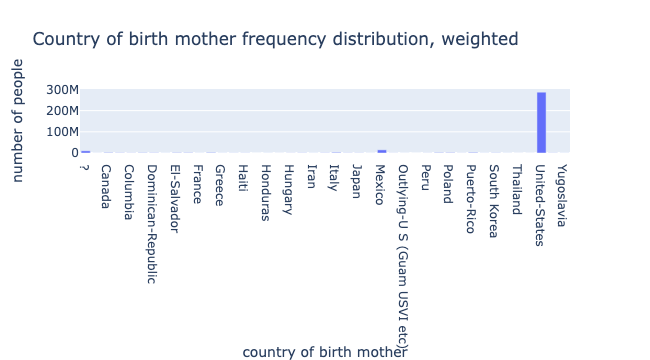

 United-States    160479
 Mexico             9781
 ?                  6119
 Puerto-Rico        2473
 Italy              1844
 Canada             1451
 Germany            1382
 Philippines        1231
 Poland             1110
 El-Salvador        1108
Name: country of birth mother, dtype: int64

year     frequency
0   94  1.725706e+08
1   95  1.746753e+08

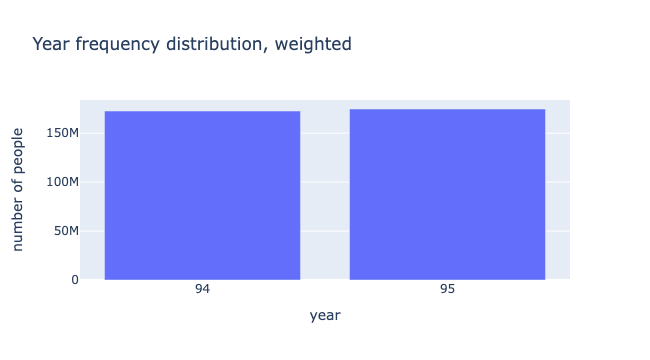

94    99827
95    99696
Name: year, dtype: int64

detailed occupation recode     frequency
0                           0  1.716781e+08
1                           1  8.747237e+05
2                          10  6.416374e+06
3                          11  1.176442e+06
4                          12  5.901692e+06
5                          13  2.331243e+06
6                          14  1.680088e+06
7                          15  1.449122e+06
8                          16  6.098924e+06
9                          17  3.348955e+06
10                         18  1.986135e+06
11                         19  9.657683e+06
12                          2  1.552914e+07
13                         20  1.236444e+05
14                         21  9.731771e+05
15                         22  7.751735e+05
16                         23  5.802841e+06
17                         24  3.233661e+06
18                         25  1.332336e+06
19                         26  1.423649e+07
20                         27  1.311144e+06
21                         28  3.179314e+06
22                         29  9.024991e+06
23                          3  5.787300e+06
24                         30  3.315522e+06
25                         31  4.549751e+06
26                         32  4.077207e+06
27                         33  5.969314e+06
28                         34  7.226938e+06
29                         35  5.647002e+06
30                         36  7.306074e+06
31                         37  4.032525e+06
32                         38  5.455106e+06
33                         39  1.810746e+06
34                          4  2.472664e+06
35                         40  1.157041e+06
36                         41  2.923630e+06
37                         42  3.500256e+06
38                         43  2.023703e+06
39                         44  2.879562e+06
40                         45  2.739011e+05
41                         46  6.901379e+04
42                          5  1.613614e+06
43                          6  7.869561e+05
44                          7  1.249108e+06
45                          8  3.760496e+06
46                          9  1.237089e+06

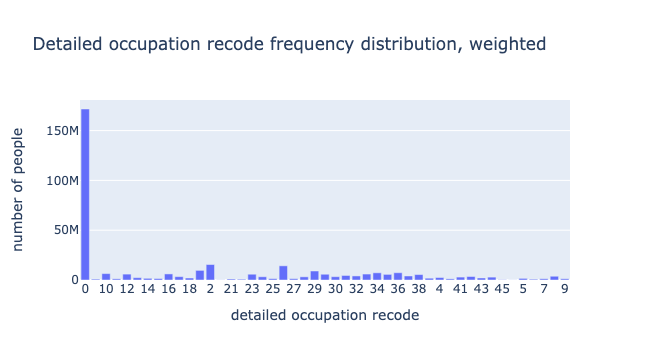

0     100684
2       8756
26      7887
19      5413
29      5105
36      4145
34      4025
10      3683
16      3445
23      3392
Name: detailed occupation recode, dtype: int64

detailed industry recode     frequency
0                         0  1.716781e+08
1                         1  1.611460e+06
2                        10  4.507460e+03
3                        11  3.299462e+06
4                        12  2.465755e+06
5                        13  1.601240e+06
6                        14  6.212111e+05
7                        15  8.421103e+05
8                        16  9.480179e+05
9                        17  2.759146e+05
10                       18  7.628423e+05
11                       19  2.391464e+06
12                        2  3.357887e+06
13                       20  6.054912e+04
14                       21  9.923656e+05
15                       22  1.606832e+06
16                       23  9.571031e+05
17                       24  2.757801e+06
18                       25  1.894776e+06
19                       26  2.177694e+05
20                       27  1.098737e+06
21                       28  2.223718e+05
22                       29  7.486664e+06
23                        3  8.755347e+05
24                       30  2.078938e+06
25                       31  2.139292e+06
26                       32  6.456143e+06
27                       33  3.056142e+07
28                       34  4.992545e+06
29                       35  6.105827e+06
30                       36  1.604126e+06
31                       37  7.756533e+06
32                       38  2.971557e+06
33                       39  4.959266e+06
34                        4  1.069942e+07
35                       40  2.947153e+06
36                       41  6.833430e+06
37                       42  8.266903e+06
38                       43  1.436299e+07
39                       44  4.266264e+06
40                       45  8.053509e+06
41                       46  2.526702e+05
42                       47  3.029735e+06
43                       48  1.132652e+06
44                       49  1.142580e+06
45                        5  9.901148e+05
46                       50  2.864626e+06
47                       51  6.901379e+04
48                        6  1.028839e+06
49                        7  7.873992e+05
50                        8  1.036572e+06
51                        9  1.825931e+06

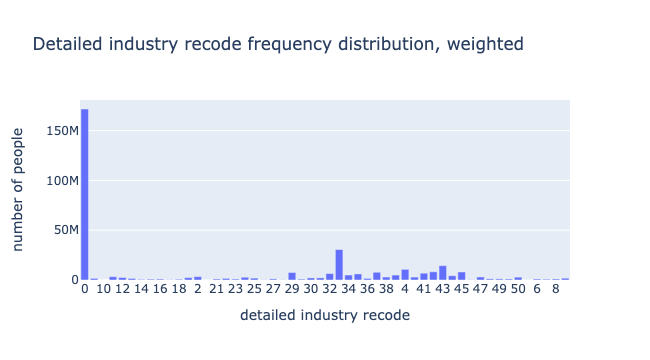

0     100684
33     17070
43      8283
4       5984
42      4683
45      4482
29      4209
37      4022
41      3964
32      3596
Name: detailed industry recode, dtype: int64

education    frequency
0                                10th grade  13272987.31
1                                11th grade  12290046.29
2                     12th grade no diploma   3760879.44
3                  1st 2nd 3rd or 4th grade   2937692.92
4                          5th or 6th grade   5178876.45
5                         7th and 8th grade  13126143.41
6                                 9th grade  10520947.09
7        Associates degree-academic program   7923965.51
8       Associates degree-occup /vocational   9186755.06
9                Bachelors degree(BA AB BS)  35738476.21
10                                 Children  79104048.39
11                Doctorate degree(PhD EdD)   2223026.44
12                     High school graduate  85589219.42
13                      Less than 1st grade   1465802.11
14   Masters degree(MA MS MEng MEd MSW MBA)  11475673.95
15   Prof school degree (MD DDS DVM LLB JD)   3155198.08
16               Some college but no degree  50296154.39

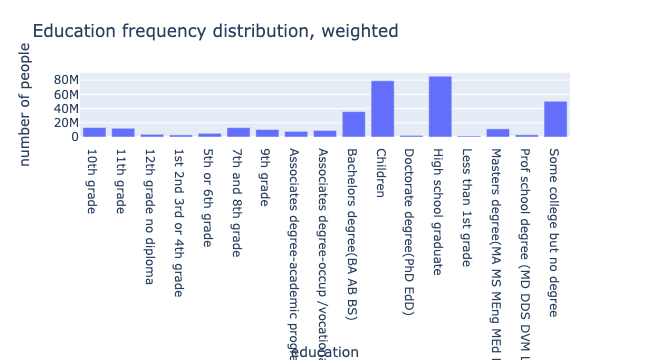

 High school graduate                      48407
 Children                                  47422
 Some college but no degree                27820
 Bachelors degree(BA AB BS)                19865
 7th and 8th grade                          8007
 10th grade                                 7557
 11th grade                                 6876
 Masters degree(MA MS MEng MEd MSW MBA)     6541
 9th grade                                  6230
 Associates degree-occup /vocational        5358
Name: education, dtype: int64

detailed household and family stat    frequency
0             Child 18+ ever marr Not in a subfamily   2387277.63
1                Child 18+ ever marr RP of subfamily   1144376.58
2            Child 18+ never marr Not in a subfamily  24052052.80
3               Child 18+ never marr RP of subfamily   1098979.82
4                   Child 18+ spouse of subfamily RP    222928.62
5                Child <18 ever marr RP of subfamily     11615.70
6               Child <18 ever marr not in subfamily     56950.34
7               Child <18 never marr RP of subfamily    160709.87
8              Child <18 never marr not in subfamily  83782077.81
9                   Child <18 spouse of subfamily RP      2399.63
10           Child under 18 of RP of unrel subfamily   1291044.38
11          Grandchild 18+ ever marr RP of subfamily     17278.71
12         Grandchild 18+ ever marr not in subfamily     76989.40
13         Grandchild 18+ never marr RP of subfamily     10161.31
14        Grandchild 18+ never marr not in subfamily    844103.23
15             Grandchild 18+ spouse of subfamily RP     14782.69
16         Grandchild <18 ever marr not in subfamily      3592.74
17         Grandchild <18 never marr RP of subfamily      3310.09
18   Grandchild <18 never marr child of subfamily RP   3267454.13
19        Grandchild <18 never marr not in subfamily   1894285.51
20                                       Householder  91596449.50
21                                 In group quarters    281622.02
22                             Nonfamily householder  38663476.27
23           Other Rel 18+ ever marr RP of subfamily   1086220.61
24          Other Rel 18+ ever marr not in subfamily   3524633.65
25          Other Rel 18+ never marr RP of subfamily    159769.63
26         Other Rel 18+ never marr not in subfamily   3353780.84
27              Other Rel 18+ spouse of subfamily RP   1054475.75
28           Other Rel <18 ever marr RP of subfamily      8888.11
29          Other Rel <18 ever marr not in subfamily      2031.60
30    Other Rel <18 never marr child of subfamily RP   1090627.35
31         Other Rel <18 never marr not in subfamily   1108378.20
32       Other Rel <18 never married RP of subfamily      6985.43
33              Other Rel <18 spouse of subfamily RP      4223.66
34                         RP of unrelated subfamily   1272343.50
35                              Secondary individual  12055761.99
36               Spouse of RP of unrelated subfamily     82722.47
37                             Spouse of householder  71551130.90

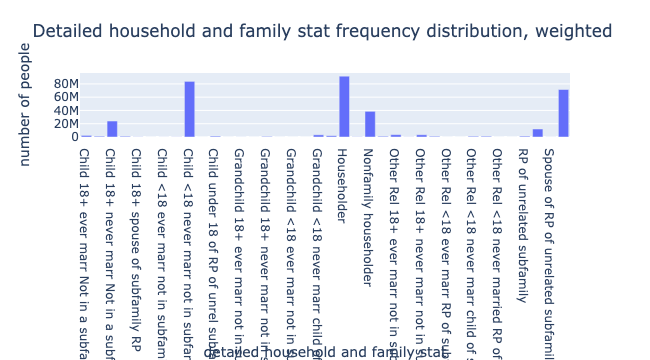

 Householder                                        53248
 Child <18 never marr not in subfamily              50326
 Spouse of householder                              41695
 Nonfamily householder                              22213
 Child 18+ never marr Not in a subfamily            12030
 Secondary individual                                6122
 Other Rel 18+ ever marr not in subfamily            1956
 Grandchild <18 never marr child of subfamily RP     1868
 Other Rel 18+ never marr not in subfamily           1728
 Grandchild <18 never marr not in subfamily          1066
Name: detailed household and family stat, dtype: int64

citizenship     frequency
0           Foreign born- Not a citizen of U S   2.094453e+07
1   Foreign born- U S citizen by naturalization  9.195009e+06
2     Native- Born abroad of American Parent(s)  2.954360e+06
3   Native- Born in Puerto Rico or U S Outlying  1.760837e+06
4             Native- Born in the United States  3.123912e+08

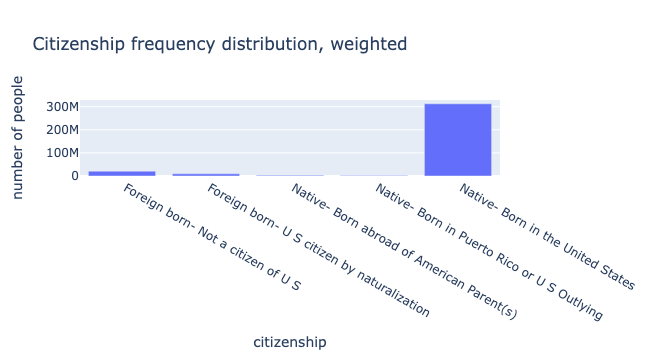

 Native- Born in the United States              176992
 Foreign born- Not a citizen of U S              13401
 Foreign born- U S citizen by naturalization      5855
 Native- Born abroad of American Parent(s)        1756
 Native- Born in Puerto Rico or U S Outlying      1519
Name: citizenship, dtype: int64

enroll in edu inst last wk     frequency
0      College or university  1.066958e+07
1                High school  1.207229e+07
2            Not in universe  3.245040e+08

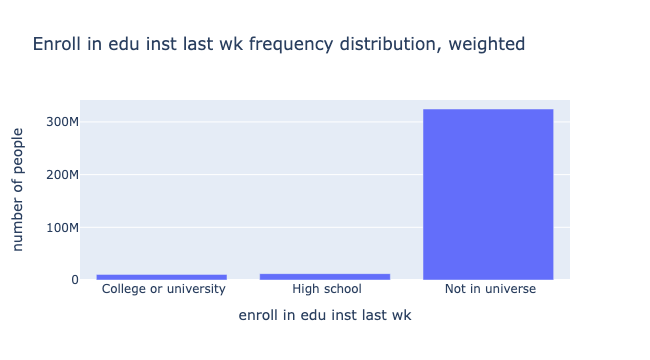

 Not in universe          186943
 High school                6892
 College or university      5688
Name: enroll in edu inst last wk, dtype: int64

In [26]:
for f in nom_fields:
    display(HTML(f'<h3>Weighted descriptive stats for: {f}</h3>'))
       

    s = train_df[[f, 'instance weight']].groupby(f)['instance weight']\
        .sum().reset_index()
    
    s.rename(columns={'instance weight': 'frequency'}, inplace=True)
    
    display(HTML('<h3>Frequency distribution table, weighted:</h3>'))
    display(s)
    
    fig = px.bar(
        x=s[f], 
        y=s['frequency'],  
        title=f'{f.capitalize()} frequency distribution, weighted'
    )
    fig.update_layout(xaxis_title=f, yaxis_title='number of people')
    fig.show()
    
    display(HTML('<h3>Top 10 most frequent values, unweighted:</h3>'))
    display(train_df[f].value_counts(dropna=False).head(10))
    display(HTML('<hr><br>'))

## 3. Save cleaned training data

In [27]:
train_df.to_pickle('cleaned_train_df.pkl')

## 4. Clean and save test data

In [28]:
test_df['year'] = test_df['year'].astype(str)
test_df['detailed occupation recode'] = \
    test_df['detailed occupation recode'].astype(str)
test_df['detailed industry recode'] = \
    test_df['detailed industry recode'].astype(str)
test_df['veterans benefits'] = \
    test_df['veterans benefits'].astype(str)
test_df['own business or self employed'] = \
    test_df['own business or self employed'].astype(str)

In [29]:
test_df.to_pickle('cleaned_test_df.pkl')

### Save field names

In [30]:
with open('con_fields.pkl', 'wb') as f:
    pickle.dump(con_fields, f) 

In [31]:
with open('nom_fields.pkl', 'wb') as f:
    pickle.dump(nom_fields, f) 